## EDA 사전 세팅

In [2]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
import openai
import folium

os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        
        style='darkgrid')

In [2]:
df_Medical = pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/창원 의료기관 현황.csv', encoding='cp949')
df_therapy = pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/창원 치료시설 현황.csv', encoding='cp949')
df_population = pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/경상남도 창원시_빅데이터_시도 시군구 법정동 행정동 소지역블럭 코드_20200825.csv', encoding='cp949')
df4 = pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/창원시주택가격.csv', encoding='cp949')

/var/folders/fs/kl20xgn54d3bgs5lpqcv3b_00000gn/T/ipykernel_27837/3045920165.py:4: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/창원시주택가격.csv', encoding='cp949')


In [3]:
df_Medical

,일련번호,의료기관명,병상수,소 재 지,개설주체_민간 또는공공,개설일자,전화번호
0,1,창원경상국립대학교병원,533,"경상남도 창원시 성산구 삼정자로 11 (성주동, 창원경상대학교병원)",공공,2016-01-15,055-214-2000
1,2,의료법인 한마음국제의료재단 한마음창원병원,376,경상남도 창원시 성산구 원이대로682번길 21 (상남동),민간,2002-04-01,055-267-2000
2,3,재단법인대구포교성베네딕도수녀회창원파티마병원,441,경상남도 창원시 의창구 창이대로 45 (명서동),민간,1983-02-02,055-270-1000
3,4,근로복지공단 창원병원,267,경상남도 창원시 성산구 창원대로 721 (중앙동),공공,1979-11-26,055-280-7619
4,5,의료법인청아의료재단청아병원,279,경상남도 창원시 마산회원구 내서읍 광려천서로 67 (청아병원),민간,2002-07-03,055-230-1500
...,...,...,...,...,...,...,...
1295,3734,LG전자㈜ 창원2공장부속의원,0,경상남도 창원시 성산구 완암로 84 (성산동),민간,2003-03-18,055-269-3197
1296,3735,㈜LG창원1공장부속의원,0,경상남도 창원시 성산구 성산패총로 170 (가음정동),민간,1994-01-31,055-260-3138
1297,3736,두산공작기계(주)부속의원,0,경상남도 창원시 성산구 정동로162번길 40 (남산동),민간,1991-11-20,055-280-4175
1298,3737,경찰공제회부속경남의원,0,경상남도 창원시 마산합포구 진동면 진북산업로 90-1 (마산운전면허시험장),민간,1989-04-11,055-271-4535


In [4]:
df_therapy

,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수
0,㈜LG창원1공장부속의원,경상남도,창원시 성산구,의원,일반의,경상남도 창원시 성산구 성산패총로 170 (가음정동),0,0,0,0,0
1,21세기내과의원,경상남도,창원시 성산구,의원,내과,"경상남도 창원시 성산구 반송로 150 (반림동, 회성빌딩3층)",0,0,0,0,0
2,21세기정형외과의원,경상남도,창원시 성산구,의원,정형외과,"경상남도 창원시 성산구 반송로 150 (반림동, 회성빌딩4,5층)",0,0,0,0,0
3,365병원,경상남도,창원시 마산회원구,병원,일반의,경상남도 창원시 마산회원구 3·15대로 686 (석전동),0,0,0,0,0
4,BBC의원,경상남도,창원시 마산회원구,의원,일반의,"경상남도 창원시 마산회원구 3·15대로 775 (합성동, 합성메디칼센타)",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
686,희망병원,경상남도,창원시 진해구,병원,일반의,"경상남도 창원시 진해구 용원로 15 (용원동, 희망병원)",0,0,0,0,0
687,희연병원,경상남도,창원시 성산구,병원,일반의,"경상남도 창원시 성산구 원이대로393번길 25, 케이프타운 4-5층 일부, 6층 지...",0,0,0,0,0
688,희연요양병원,경상남도,창원시 성산구,요양병원,해당사항없음,"경상남도 창원시 성산구 원이대로393번길 25, 케이프타운 2-4층 일부, 지하1-...",0,0,0,0,1
689,희연의원,경상남도,창원시 성산구,의원,일반의,"경상남도 창원시 성산구 원이대로393번길 25, 5층 5001호 (반지동, 케이프타운)",0,0,0,0,0


In [26]:
df_population

,연번,집계구코드,시도,시군구,행정동명,행정동코드,구코드,도코드,법정동명,법정동코드,상권코드,상권이름,영역둘레,영역면적
0,130163.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,731.036973,21603.740420
1,130164.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,1061.614878,21296.250140
2,130165.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,786.234564,22020.422520
3,130166.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,886.558233,19784.205270
4,130167.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,600.948183,16868.523740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,135604.0,38115700000000000000,경상남도,창원시 진해구,웅동2동,4.812965e+09,48129.0,48.0,용원동,4.812916e+09,NaN,NaN,411.711289,7169.527109
2802,135027.0,38113500000000000000,경상남도,창원시 마산합포구,월영동,4.812553e+09,48125.0,48.0,해운동,4.812516e+09,NaN,NaN,4088.982805,422714.764600
2803,138108.0,38115700000000000000,경상남도,창원시 진해구,웅동2동,4.812965e+09,48129.0,48.0,안골동,4.812916e+09,NaN,NaN,607.005425,3672.573346
2804,138109.0,38115700000000000000,경상남도,창원시 진해구,웅동2동,4.812965e+09,48129.0,48.0,용원동,4.812916e+09,NaN,NaN,85.032797,152.343844


In [5]:
count = len(set(df_therapy['주소']).intersection(set(df_Medical['소 재 지'])))

# 결과 출력
print("동일한 값 개수:", count)

동일한 값 개수: 590


In [28]:
df_population = df_population[:-1]
print(len(df_population['행정동명'].unique()))
df_population['행정동명'].unique()

57


array(['의창동', '팔룡동', '명곡동', '봉림동', '용지동', '상남동', '월영동', '문화동', '반월중앙동',
       '완월동', '오동동', '교방동', '노산동', '합포동', '산호동', '회원1동', '회원2동', '석전동',
       '양덕1동', '양덕2동', '합성1동', '합성2동', '구암1동', '구암2동', '중앙동', '동읍', '북면',
       '대산면', '반송동', '사파동', '성주동', '가음정동', '웅남동', '구산면', '진동면', '진북면',
       '진전면', '현동', '가포동', '자산동', '내서읍', '회성동', '봉암동', '충무동', '석동', '이동',
       '태평동', '여좌동', '태백동', '경화동', '병암동', '자은동', '덕산동', '풍호동', '웅천동',
       '웅동1동', '웅동2동'], dtype=object)

In [29]:
dong = []

In [30]:
dong = df_population['행정동명'].unique().tolist()

In [31]:
구_리스트 = ['성산구', '의창구', '마산합포구', '마산회원구', '진해구', '합포구', '희원구']

# 구 이름 추출 함수
def extract_gu(address):
    for gu in 구_리스트:
        if gu in address:
            return gu
    return ''


df_Medical['구'] = df_Medical['소 재 지'].apply(extract_gu)

In [32]:
def extract_dong(address):
    for gu in dong:
        if gu in address:
            return gu
    return ''


df_Medical['행정동명'] = df_Medical['소 재 지'].apply(extract_dong)

In [33]:
def extract_dong(address):
    for gu in dong:
        if gu in address:
            return gu
    return ''


df_therapy['행정동명'] = df_therapy['주소'].apply(extract_dong)

In [86]:
df_Medical.to_csv("df_Medical.csv", encoding='cp949')

In [85]:
df_Medical

,일련번호,의료기관명,병상수,소 재 지,개설주체_민간 또는공공,개설일자,전화번호,구,행정동명
0,1,창원경상국립대학교병원,533,"경상남도 창원시 성산구 삼정자로 11 (성주동, 창원경상대학교병원)",공공,2016-01-15,055-214-2000,성산구,성주동
1,2,의료법인 한마음국제의료재단 한마음창원병원,376,경상남도 창원시 성산구 원이대로682번길 21 (상남동),민간,2002-04-01,055-267-2000,성산구,상남동
2,3,재단법인대구포교성베네딕도수녀회창원파티마병원,441,경상남도 창원시 의창구 창이대로 45 (명서동),민간,1983-02-02,055-270-1000,의창구,
3,4,근로복지공단 창원병원,267,경상남도 창원시 성산구 창원대로 721 (중앙동),공공,1979-11-26,055-280-7619,성산구,중앙동
4,5,의료법인청아의료재단청아병원,279,경상남도 창원시 마산회원구 내서읍 광려천서로 67 (청아병원),민간,2002-07-03,055-230-1500,마산회원구,내서읍
...,...,...,...,...,...,...,...,...,...
1295,3734,LG전자㈜ 창원2공장부속의원,0,경상남도 창원시 성산구 완암로 84 (성산동),민간,2003-03-18,055-269-3197,성산구,
1296,3735,㈜LG창원1공장부속의원,0,경상남도 창원시 성산구 성산패총로 170 (가음정동),민간,1994-01-31,055-260-3138,성산구,가음정동
1297,3736,두산공작기계(주)부속의원,0,경상남도 창원시 성산구 정동로162번길 40 (남산동),민간,1991-11-20,055-280-4175,성산구,
1298,3737,경찰공제회부속경남의원,0,경상남도 창원시 마산합포구 진동면 진북산업로 90-1 (마산운전면허시험장),민간,1989-04-11,055-271-4535,마산합포구,진동면


In [22]:
df_Medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   일련번호          1300 non-null   int64 
 1   의료기관명         1300 non-null   object
 2   병상수           1300 non-null   int64 
 3   소 재 지         1300 non-null   object
 4   개설주체_민간 또는공공  1300 non-null   object
 5   개설일자          1300 non-null   object
 6   전화번호          1300 non-null   object
 7   구             1300 non-null   object
 8   행정동명          1300 non-null   object
dtypes: int64(2), object(7)
memory usage: 101.6+ KB


In [44]:
# 데이터 프레임 생성
df = pd.DataFrame(df_Medical)

with_hood_df = df_Medical[df_Medical['행정동명'].notnull()]
with_hood_df

,일련번호,의료기관명,병상수,소 재 지,개설주체_민간 또는공공,개설일자,전화번호,구,행정동명
0,1,창원경상국립대학교병원,533,"경상남도 창원시 성산구 삼정자로 11 (성주동, 창원경상대학교병원)",공공,2016-01-15,055-214-2000,성산구,성주동
1,2,의료법인 한마음국제의료재단 한마음창원병원,376,경상남도 창원시 성산구 원이대로682번길 21 (상남동),민간,2002-04-01,055-267-2000,성산구,상남동
2,3,재단법인대구포교성베네딕도수녀회창원파티마병원,441,경상남도 창원시 의창구 창이대로 45 (명서동),민간,1983-02-02,055-270-1000,의창구,
3,4,근로복지공단 창원병원,267,경상남도 창원시 성산구 창원대로 721 (중앙동),공공,1979-11-26,055-280-7619,성산구,중앙동
4,5,의료법인청아의료재단청아병원,279,경상남도 창원시 마산회원구 내서읍 광려천서로 67 (청아병원),민간,2002-07-03,055-230-1500,마산회원구,내서읍
...,...,...,...,...,...,...,...,...,...
1295,3734,LG전자㈜ 창원2공장부속의원,0,경상남도 창원시 성산구 완암로 84 (성산동),민간,2003-03-18,055-269-3197,성산구,
1296,3735,㈜LG창원1공장부속의원,0,경상남도 창원시 성산구 성산패총로 170 (가음정동),민간,1994-01-31,055-260-3138,성산구,가음정동
1297,3736,두산공작기계(주)부속의원,0,경상남도 창원시 성산구 정동로162번길 40 (남산동),민간,1991-11-20,055-280-4175,성산구,
1298,3737,경찰공제회부속경남의원,0,경상남도 창원시 마산합포구 진동면 진북산업로 90-1 (마산운전면허시험장),민간,1989-04-11,055-271-4535,마산합포구,진동면


In [20]:
df_Medical

,일련번호,의료기관명,병상수,소 재 지,개설주체_민간 또는공공,개설일자,전화번호,구,행정동명
0,1,창원경상국립대학교병원,533,"경상남도 창원시 성산구 삼정자로 11 (성주동, 창원경상대학교병원)",공공,2016-01-15,055-214-2000,성산구,성주동
1,2,의료법인 한마음국제의료재단 한마음창원병원,376,경상남도 창원시 성산구 원이대로682번길 21 (상남동),민간,2002-04-01,055-267-2000,성산구,상남동
2,3,재단법인대구포교성베네딕도수녀회창원파티마병원,441,경상남도 창원시 의창구 창이대로 45 (명서동),민간,1983-02-02,055-270-1000,의창구,
3,4,근로복지공단 창원병원,267,경상남도 창원시 성산구 창원대로 721 (중앙동),공공,1979-11-26,055-280-7619,성산구,중앙동
4,5,의료법인청아의료재단청아병원,279,경상남도 창원시 마산회원구 내서읍 광려천서로 67 (청아병원),민간,2002-07-03,055-230-1500,마산회원구,내서읍
...,...,...,...,...,...,...,...,...,...
1295,3734,LG전자㈜ 창원2공장부속의원,0,경상남도 창원시 성산구 완암로 84 (성산동),민간,2003-03-18,055-269-3197,성산구,
1296,3735,㈜LG창원1공장부속의원,0,경상남도 창원시 성산구 성산패총로 170 (가음정동),민간,1994-01-31,055-260-3138,성산구,가음정동
1297,3736,두산공작기계(주)부속의원,0,경상남도 창원시 성산구 정동로162번길 40 (남산동),민간,1991-11-20,055-280-4175,성산구,
1298,3737,경찰공제회부속경남의원,0,경상남도 창원시 마산합포구 진동면 진북산업로 90-1 (마산운전면허시험장),민간,1989-04-11,055-271-4535,마산합포구,진동면


In [1]:
법정동 = ['명서동', '월남동', '합성동', '반지동', '사림동', '팔용동', '소계동', '봉곡동', '남양동', '서상동', '신촌동', '양덕동', '남성동', '동성동', 
       '용원동', '용호동', '반계동', '소답동','대원동', '해운동', '대성동', '덕동동', '두척동', '구암동', '회원동', '동서동', '장천동', '도계동', 
       '가음동', '반림동', '동정동', '대방동', '신월동', '안민동', '수성동', '서성동', '신포동', '장군동', '두월동', '부림동', '신항동', '남문동', 
       '마천동', '대흥동', '송학동', '성산동', '상가동', '교원동', '중성동', '청안동', '테크동', '창선동', '화천동', '안골동', '중원동', '귀곡동', '남산동']

In [39]:
df_Medical['개설주체_민간 또는공공'].unique()

array(['공공', '민간', '국립', '개인'], dtype=object)

### 구별

3. 구별 병원 분포, 행정동별 병원 분포 확인 (병원 구분, 민관 구분, 병상 척도화해서 구분)
    
    구분한거 안한거 다해야 봐야함(지혁)

성산구      331
의창구      272
마산회원구    256
마산합포구    241
진해구      200
Name: 구, dtype: int64


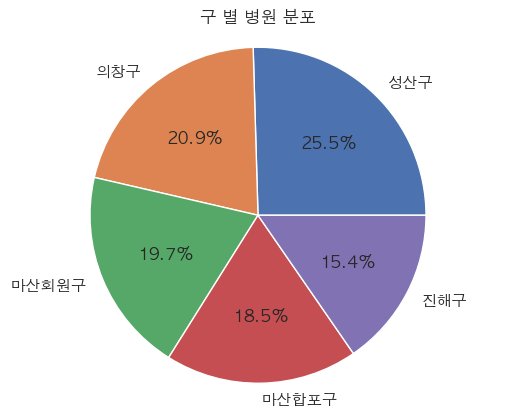

In [40]:
# 구별 병원 분포
count = df_Medical['구'].value_counts()
print(count)

plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title("구 별 병원 분포")
plt.show()

민간    987
개인    305
공공      6
국립      2
Name: 개설주체_민간 또는공공, dtype: int64


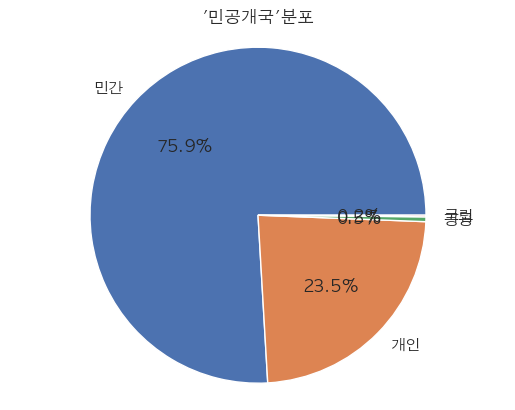

In [41]:
count = df_Medical['개설주체_민간 또는공공'].value_counts()
print(count)

plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.title("'민공개국'분포")
plt.show()

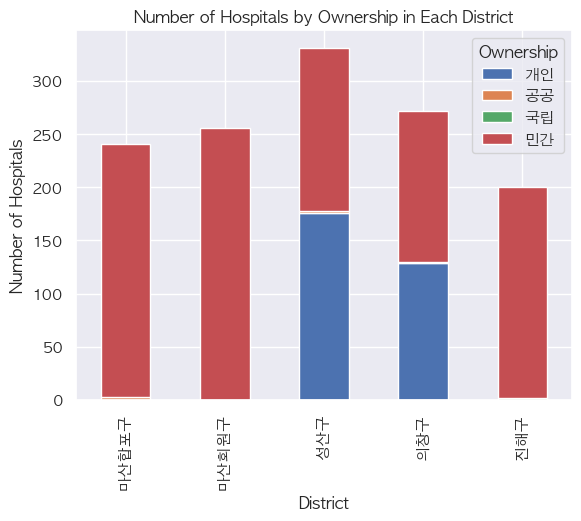

In [42]:
hospital_counts = df_Medical.groupby(['구', '개설주체_민간 또는공공']).size().unstack().fillna(0)
hospital_counts.plot(kind='bar', stacked=True)

plt.title('Number of Hospitals by Ownership in Each District')
plt.xlabel('District')
plt.ylabel('Number of Hospitals')
plt.legend(title='Ownership')

plt.show()

창원시 마산회원구    151
창원시 성산구      150
창원시 의창구      148
창원시 마산합포구    134
창원시 진해구      108
Name: 시군구명, dtype: int64


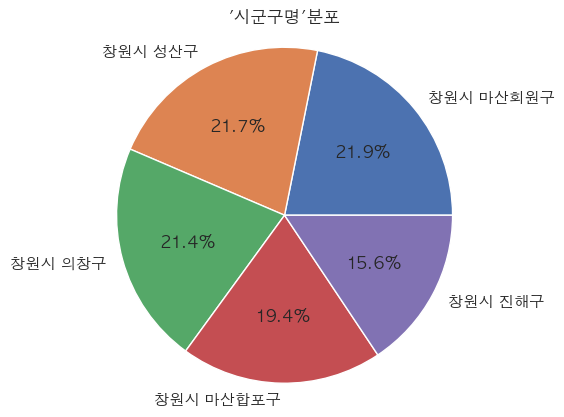

In [43]:

count = df_therapy['시군구명'].value_counts()
print(count)

plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title("'시군구명'분포")
plt.show()

In [44]:
import pandas as pd

def update_display_subject(row):
    if row['요양기관종별'] == '요양병원':
        return '요양병원'
    elif row['요양기관종별'] == '정신병원':
        return '정신병원'
    elif '보건' in row['요양기관종별']:
        return '보건소'
    else:
        return row['표시과목']

# 데이터프레임 복사
df_updated = df_therapy.copy()

# '표시과목' 값 변경
df_updated['표시과목'] = df_updated.apply(update_display_subject, axis=1)


In [45]:
df_updated

,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수,행정동명
0,㈜LG창원1공장부속의원,경상남도,창원시 성산구,의원,일반의,경상남도 창원시 성산구 성산패총로 170 (가음정동),0,0,0,0,0,가음정동
1,21세기내과의원,경상남도,창원시 성산구,의원,내과,"경상남도 창원시 성산구 반송로 150 (반림동, 회성빌딩3층)",0,0,0,0,0,
2,21세기정형외과의원,경상남도,창원시 성산구,의원,정형외과,"경상남도 창원시 성산구 반송로 150 (반림동, 회성빌딩4,5층)",0,0,0,0,0,
3,365병원,경상남도,창원시 마산회원구,병원,일반의,경상남도 창원시 마산회원구 3·15대로 686 (석전동),0,0,0,0,0,석전동
4,BBC의원,경상남도,창원시 마산회원구,의원,일반의,"경상남도 창원시 마산회원구 3·15대로 775 (합성동, 합성메디칼센타)",0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
686,희망병원,경상남도,창원시 진해구,병원,일반의,"경상남도 창원시 진해구 용원로 15 (용원동, 희망병원)",0,0,0,0,0,
687,희연병원,경상남도,창원시 성산구,병원,일반의,"경상남도 창원시 성산구 원이대로393번길 25, 케이프타운 4-5층 일부, 6층 지...",0,0,0,0,0,
688,희연요양병원,경상남도,창원시 성산구,요양병원,요양병원,"경상남도 창원시 성산구 원이대로393번길 25, 케이프타운 2-4층 일부, 지하1-...",0,0,0,0,1,
689,희연의원,경상남도,창원시 성산구,의원,일반의,"경상남도 창원시 성산구 원이대로393번길 25, 5층 5001호 (반지동, 케이프타운)",0,0,0,0,0,


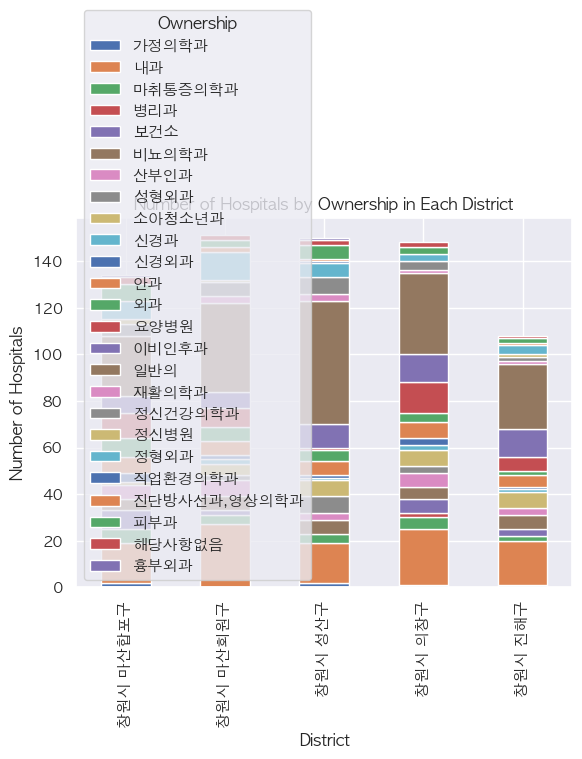

In [46]:
hospital_counts = df_updated.groupby(['시군구명', '표시과목']).size().unstack().fillna(0)
hospital_counts.plot(kind='bar', stacked=True)

plt.title('Number of Hospitals by Ownership in Each District')
plt.xlabel('District')
plt.ylabel('Number of Hospitals')
plt.legend(title='Ownership')

plt.show()

In [47]:
df_성산구 = df_updated[df_updated['시군구명'] == '창원시 성산구'].copy()
df_마산회원구 = df_updated[df_updated['시군구명'] == '창원시 마산회원구'].copy()
df_마산합포구 = df_updated[df_updated['시군구명'] == '창원시 마산합포구'].copy()
df_의창구 = df_updated[df_updated['시군구명'] == '창원시 의창구'].copy()
df_진해구 = df_updated[df_updated['시군구명'] == '창원시 진해구'].copy()

In [48]:
df_성산구

,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수,행정동명
0,㈜LG창원1공장부속의원,경상남도,창원시 성산구,의원,일반의,경상남도 창원시 성산구 성산패총로 170 (가음정동),0,0,0,0,0,가음정동
1,21세기내과의원,경상남도,창원시 성산구,의원,내과,"경상남도 창원시 성산구 반송로 150 (반림동, 회성빌딩3층)",0,0,0,0,0,
2,21세기정형외과의원,경상남도,창원시 성산구,의원,정형외과,"경상남도 창원시 성산구 반송로 150 (반림동, 회성빌딩4,5층)",0,0,0,0,0,
5,CNA서울아동병원,경상남도,창원시 성산구,병원,소아청소년과,"경상남도 창원시 성산구 마디미서로 54 (상남동, 7,8,9,12층)",0,0,0,0,0,상남동
6,Dr 윤의원,경상남도,창원시 성산구,의원,일반의,"경상남도 창원시 성산구 중앙대로 123 (중앙동, 롯데마트4층)",0,0,0,0,0,중앙동
...,...,...,...,...,...,...,...,...,...,...,...,...
678,화이트라인하얀피부과의원,경상남도,창원시 성산구,의원,피부과,"경상남도 창원시 성산구 마디미서로 26 (상남동, 한독빌딩5층)",0,0,0,0,0,상남동
679,활기찬정형외과통증의학과의원,경상남도,창원시 성산구,의원,정형외과,"경상남도 창원시 성산구 대암로 247, 더 스퀘어 A동 6층 (성주동)",0,0,0,0,0,성주동
687,희연병원,경상남도,창원시 성산구,병원,일반의,"경상남도 창원시 성산구 원이대로393번길 25, 케이프타운 4-5층 일부, 6층 지...",0,0,0,0,0,
688,희연요양병원,경상남도,창원시 성산구,요양병원,요양병원,"경상남도 창원시 성산구 원이대로393번길 25, 케이프타운 2-4층 일부, 지하1-...",0,0,0,0,1,


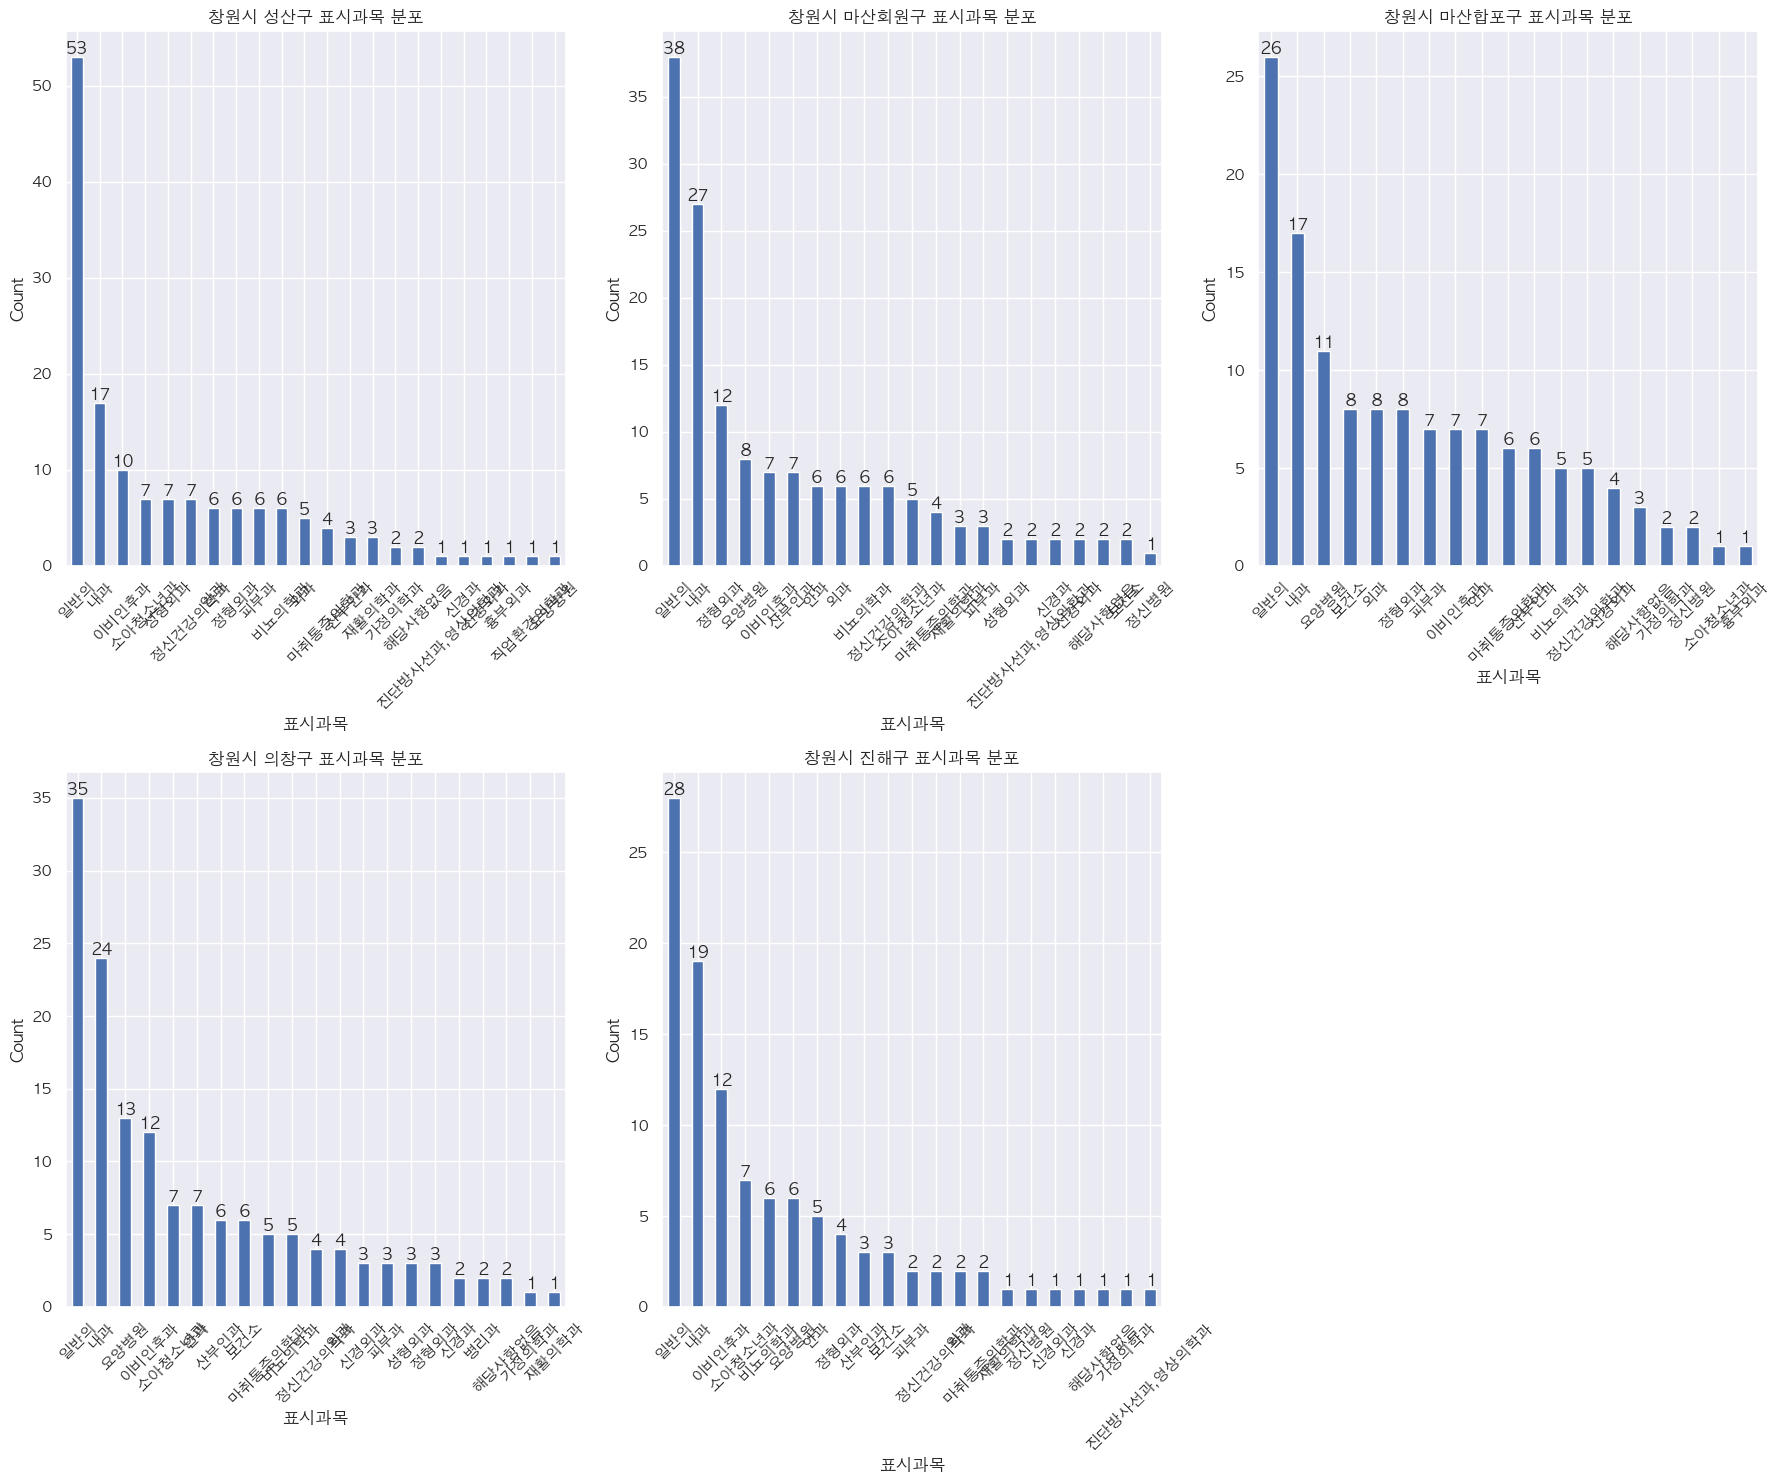

In [49]:
dataframes = [df_성산구, df_마산회원구, df_마산합포구, df_의창구, df_진해구]

plt.figure(figsize=(18, 15))

for i, df in enumerate(dataframes):
 
    count = df['표시과목'].value_counts()


    ax = plt.subplot(2, 3, i+1)
    count.plot(kind='bar', ax=ax)
    plt.title(df.iloc[0]['시군구명'] + " 표시과목 분포")
    plt.xlabel("표시과목")
    plt.ylabel("Count")
    plt.xticks(rotation=45)


    for i, v in enumerate(count):
        ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

구 별 가구 당 병원 개수(지혁)

In [50]:
df_pop = pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/주민등록인구통계.csv', encoding='cp949')

In [64]:
df_pop

,주소,자치구,행정동,동읍리(법정동),총인구수,총가구수,가구당인구수,평균소득
0,경상남도 창원시 의창구 동읍,의창구,동읍,용강리,19576,7924,2.47,2302.14
1,경상남도 창원시 의창구 동읍,의창구,동읍,용전리,19576,7924,2.47,2376.02
2,경상남도 창원시 의창구 동읍,의창구,동읍,남산리,19576,7924,2.47,2711.18
3,경상남도 창원시 의창구 동읍,의창구,동읍,덕천리,19576,7924,2.47,3135.00
4,경상남도 창원시 의창구 동읍,의창구,동읍,덕산리,19576,7924,2.47,2702.03
...,...,...,...,...,...,...,...,...
326,경상남도 창원시 마산회원구 합성2동,마산회원구,합성2동,합성동,8192,3700,2.21,2496.11
327,경상남도 창원시 마산회원구 구암1동,마산회원구,구암1동,구암동,8959,4004,2.24,2522.92
328,경상남도 창원시 마산회원구 구암2동,마산회원구,구암2동,구암동,9688,4219,2.30,2522.92
329,경상남도 창원시 마산회원구 봉암동,마산회원구,봉암동,봉암동,4453,1954,2.28,2147.22


In [52]:
df_population

,연번,집계구코드,시도,시군구,행정동명,행정동코드,구코드,도코드,법정동명,법정동코드,상권코드,상권이름,영역둘레,영역면적
0,130163.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,731.036973,21603.740420
1,130164.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,1061.614878,21296.250140
2,130165.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,786.234564,22020.422520
3,130166.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,886.558233,19784.205270
4,130167.0,38111500000000000000,경상남도,창원시 의창구,의창동,4.812151e+09,48121.0,48.0,소계동,4.812111e+09,2_0062,소계동,600.948183,16868.523740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,135603.0,38115700000000000000,경상남도,창원시 진해구,웅동2동,4.812965e+09,48129.0,48.0,용원동,4.812916e+09,NaN,NaN,393.717475,6826.949166
2801,135604.0,38115700000000000000,경상남도,창원시 진해구,웅동2동,4.812965e+09,48129.0,48.0,용원동,4.812916e+09,NaN,NaN,411.711289,7169.527109
2802,135027.0,38113500000000000000,경상남도,창원시 마산합포구,월영동,4.812553e+09,48125.0,48.0,해운동,4.812516e+09,NaN,NaN,4088.982805,422714.764600
2803,138108.0,38115700000000000000,경상남도,창원시 진해구,웅동2동,4.812965e+09,48129.0,48.0,안골동,4.812916e+09,NaN,NaN,607.005425,3672.573346


In [53]:
df_pop = pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/읍면동별평균소득 (1).csv', encoding='cp949')

In [54]:
df_pop

,주소,자치구,행정동,동읍리(법정동),총인구수,총가구수,가구당인구수,평균소득
0,경상남도 창원시 의창구 동읍,의창구,동읍,용강리,19576,7924,2.47,2302.14
1,경상남도 창원시 의창구 동읍,의창구,동읍,용전리,19576,7924,2.47,2376.02
2,경상남도 창원시 의창구 동읍,의창구,동읍,남산리,19576,7924,2.47,2711.18
3,경상남도 창원시 의창구 동읍,의창구,동읍,덕천리,19576,7924,2.47,3135.00
4,경상남도 창원시 의창구 동읍,의창구,동읍,덕산리,19576,7924,2.47,2702.03
...,...,...,...,...,...,...,...,...
326,경상남도 창원시 마산회원구 합성2동,마산회원구,합성2동,합성동,8192,3700,2.21,2496.11
327,경상남도 창원시 마산회원구 구암1동,마산회원구,구암1동,구암동,8959,4004,2.24,2522.92
328,경상남도 창원시 마산회원구 구암2동,마산회원구,구암2동,구암동,9688,4219,2.30,2522.92
329,경상남도 창원시 마산회원구 봉암동,마산회원구,봉암동,봉암동,4453,1954,2.28,2147.22


In [55]:
df_filtered = df_pop.drop_duplicates(subset='행정동')

# 결과 출력
df_filtered

,주소,자치구,행정동,동읍리(법정동),총인구수,총가구수,가구당인구수,평균소득
0,경상남도 창원시 의창구 동읍,의창구,동읍,용강리,19576,7924,2.47,2302.14
24,경상남도 창원시 의창구 북면,의창구,북면,지개리,42584,15529,2.74,2506.23
42,경상남도 창원시 의창구 대산면,의창구,대산면,갈전리,7272,3198,2.27,1869.17
51,경상남도 창원시 의창구 의창동,의창구,의창동,북동,49920,19918,2.51,2504.74
58,경상남도 창원시 의창구 팔룡동,의창구,팔룡동,삼동동,39493,14839,2.66,2498.33
66,경상남도 창원시 의창구 명곡동,의창구,명곡동,도계동,42197,17199,2.45,3550.05
70,경상남도 창원시 의창구 봉림동,의창구,봉림동,용동,31639,14575,2.17,2609.20
76,경상남도 창원시 의창구 용지동,의창구,용지동,신월동,29522,12661,2.33,4463.30
78,경상남도 창원시 성산구 반송동,성산구,반송동,반송동,41380,15100,2.74,2253.50
81,경상남도 창원시 성산구 중앙동,성산구,중앙동,외동,24175,12374,1.95,1255.29


In [56]:
df_grouped = df_filtered.groupby('자치구')['총가구수'].sum().reset_index()

# 결과 출력
print(df_grouped)

     자치구    총가구수
0  마산합포구   72452
1  마산회원구   77008
2    성산구   83048
3    의창구  105843
4    진해구   77184


In [57]:

df_household = pd.DataFrame({
    '자치구': ['마산합포구', '마산회원구', '성산구', '의창구', '진해구'],
    '총가구수': [72452, 77008, 83048, 105843, 77184]
})


df_hospital = pd.DataFrame({
    '자치구': ['성산구', '의창구', '마산회원구', '마산합포구', '진해구'],
    '병원 수': [331, 272, 256, 241, 200]
})

df_merged = pd.merge(df_household, df_hospital, on='자치구')
df_merged['가구 당 병원 개수'] = df_merged['병원 수'] / df_merged['총가구수']
df_merged['병원 당 가구 수'] = df_merged['총가구수'] / df_merged['병원 수']
print(df_merged)

     자치구    총가구수  병원 수  가구 당 병원 개수   병원 당 가구 수
0  마산합포구   72452   241    0.003326  300.630705
1  마산회원구   77008   256    0.003324  300.812500
2    성산구   83048   331    0.003986  250.900302
3    의창구  105843   272    0.002570  389.128676
4    진해구   77184   200    0.002591  385.920000


In [58]:
total_sum = df_therapy[['중환자실 병상수 소계', '성인중환자실 병상수', '소아중환자실 병상수', '신생아 중환자실 병상수', '격리병실 병상수']].sum()


print("중환자실 병상수 소계:", total_sum['중환자실 병상수 소계'])
print("성인중환자실 병상수:", total_sum['성인중환자실 병상수'])
print("소아중환자실 병상수:", total_sum['소아중환자실 병상수'])
print("신생아 중환자실 병상수:", total_sum['신생아 중환자실 병상수'])
print("격리병실 병상수:", total_sum['격리병실 병상수'])

중환자실 병상수 소계: 242
성인중환자실 병상수: 199
소아중환자실 병상수: 0
신생아 중환자실 병상수: 43
격리병실 병상수: 90


In [59]:
df_grouped = df_Medical.groupby('구')['병상수'].sum().reset_index()

print(df_grouped)

       구   병상수
0  마산합포구  5683
1  마산회원구  4964
2    성산구  2503
3    의창구  4687
4    진해구  2505


In [60]:
import pandas as pd


data1 = {
    '자치구': ['마산합포구', '마산회원구', '성산구', '의창구', '진해구'],
    '총가구수': [72452, 77008, 83048, 105843, 77184]
}

df1 = pd.DataFrame(data1)


data2 = {
    '구': ['마산합포구', '마산회원구', '성산구', '의창구', '진해구'],
    '병상수': [5683, 4964, 2503, 4687, 2505]
}

df2 = pd.DataFrame(data2)

merged_df = pd.merge(df1, df2, left_on='자치구', right_on='구')
merged_df['가구당 병상수'] = merged_df['병상수'] / merged_df['총가구수']
merged_df['병상수당 가구 수'] = merged_df['총가구수'] / merged_df['병상수']
print(merged_df)


     자치구    총가구수      구   병상수   가구당 병상수  병상수당 가구 수
0  마산합포구   72452  마산합포구  5683  0.078438  12.748900
1  마산회원구   77008  마산회원구  4964  0.064461  15.513296
2    성산구   83048    성산구  2503  0.030139  33.179385
3    의창구  105843    의창구  4687  0.044283  22.582249
4    진해구   77184    진해구  2505  0.032455  30.811976


In [87]:
df= pd.read_csv('/Users/choejeehyuk/DNA/경남 빅데이터활용 공모전/의료기관_최종전처리.csv', encoding='cp949')

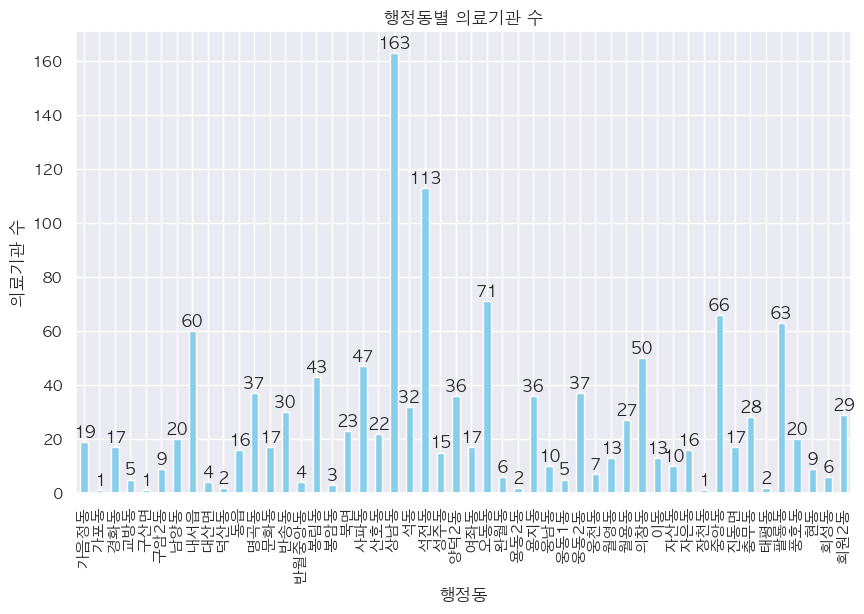

In [5]:
# 행정동별 의료기관 수 계산
count_by_hood = df['행정동명'].value_counts().sort_index()

# 그래프 생성
plt.figure(figsize=(10, 6))
count_by_hood.plot(kind='bar', color='skyblue')

# 그래프에 수치 표시
for i, v in enumerate(count_by_hood):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# 그래프 제목과 축 레이블
plt.title('행정동별 의료기관 수')
plt.xlabel('행정동')
plt.ylabel('의료기관 수')

# 그래프 출력
plt.show()

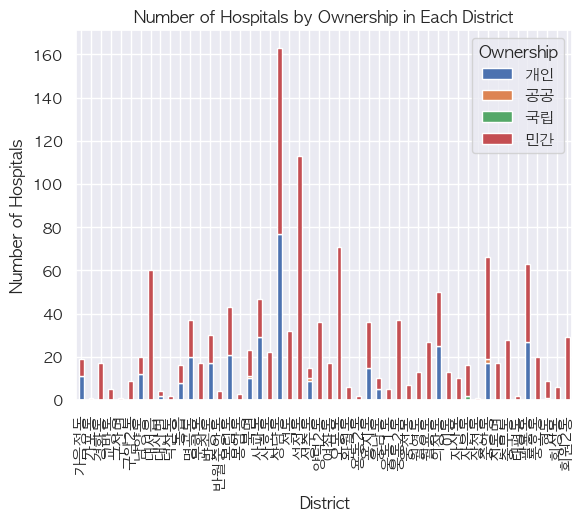

<Figure size 1500x1000 with 0 Axes>

In [7]:
df = pd.read_csv("/Users/choejeehyuk/Desktop/2023_senior/regression_analysis/경남 변수 병합.csv")

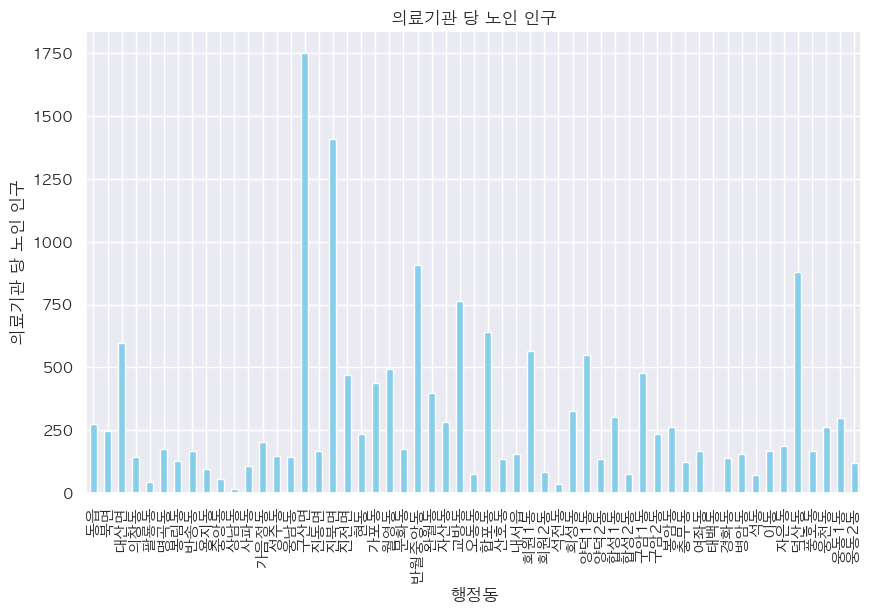

In [12]:
# 행정동별 의료기관 대비 노인 인구 계산
elderly_per_medical = df['노인총인구수'] / df['의료기관수']

# 행정동 목록
hoods = df['행정동']

# 그래프 생성
plt.figure(figsize=(10, 6))
elderly_per_medical.plot(kind='bar', color='skyblue')


# x축 라벨 설정
plt.xticks(range(len(hoods)), hoods)

# 그래프 제목과 축 레이블
plt.title('의료기관 당 노인 인구')
plt.xlabel('행정동')
plt.ylabel('의료기관 당 노인 인구')

# 그래프 출력
plt.show()

In [ ]:
hospital_counts = df.groupby(['행정동명', '개설주체_민간 또는공공']).size().unstack().fillna(0)
hospital_counts.plot(kind='bar', stacked=True)

plt.title('Number of Hospitals by Ownership in Each District')
plt.xlabel('District')
plt.ylabel('Number of Hospitals')
plt.legend(title='Ownership')
plt.show()